## Clustering in Python Using Kmeans algorithm 

#### Sequence of the Script: 
1. Importing Libraries & Data
2. Elbow Method to determine # of clusters
3. Plotting Clusters & determining statistics 

### Importing Libraries & Data 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans  # importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

path = r'/Users/aahamoustafa/Desktop/Data Projects/CitiBike'

trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_new.csv') ,index_col = False)
stations = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike-stations.csv'))


In [50]:

pd.set_option('display.max_columns', None)
trips.head()

## selecting numerical columns 
trips_num = trips.select_dtypes(include='number')
trips_num.dropna(inplace = True)
trips_num.head()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype_encoded,gender_encoded,age,start_hour,stop_hour,start_day,stop_day,month,year,trip_distance,weekday_encoded,tripduration_minutes
0,2319,520,40.759923,-73.976485,363,40.708347,-74.017134,23062,1,1,44.0,13,13,9,9,3,2016,6.677860,2,39.0
1,313,520,40.759923,-73.976485,493,40.756800,-73.982912,16909,1,0,47.0,15,15,9,9,7,2015,0.643981,3,5.0
2,798,520,40.759923,-73.976485,3258,40.750182,-74.002184,15555,1,1,26.0,18,18,20,20,4,2017,2.424841,3,13.0
4,906,520,40.759923,-73.976485,3162,40.783400,-73.980931,15614,1,1,55.0,18,18,11,11,1,2016,2.634014,0,15.0
5,716,520,40.759923,-73.976485,533,40.752996,-73.987216,19280,1,1,59.0,11,12,30,30,10,2013,1.188587,2,12.0


### 2. Elbow Method to determine # of clusters

In [46]:
## elbow technique to identify number of clusters 
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [52]:
score = [kmeans[i].fit(trips_num).score(trips_num) for i in range(len(kmeans))] 
## Creates a score that represents a rate of variation for the given cluster option.
score

[-9559065507186.906,
 -3359169370719.856,
 -2143459954371.5044,
 -1682566709281.3909,
 -1466447634854.3882,
 -1345057438677.4211,
 -1168746025871.961,
 -1053056033263.8154,
 -1005957163794.7366]

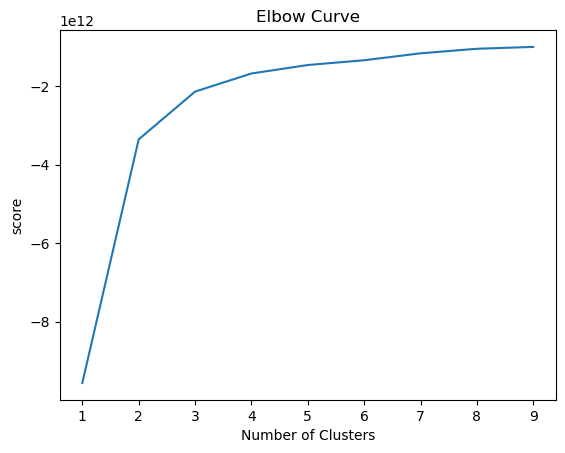

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

#### We will use 4 clusters where the curve begins to flatten out. 

### 3. Plotting Clusters & determining statistics 

In [58]:
## now we can create the k-means object 

kmeans = KMeans(n_clusters=4)

In [62]:
## next we apply the algorithm to the dataframe
kmeans.fit(trips_num)

KMeans(n_clusters=4)

In [64]:
## creating a column in the df for values corresponding to each cluster 
trips_num['clusters'] = kmeans.fit_predict(trips_num)

In [70]:
### check the value counts 
trips_num['clusters'].value_counts()

clusters
2    143449
0    138713
3     78803
1     56202
Name: count, dtype: int64

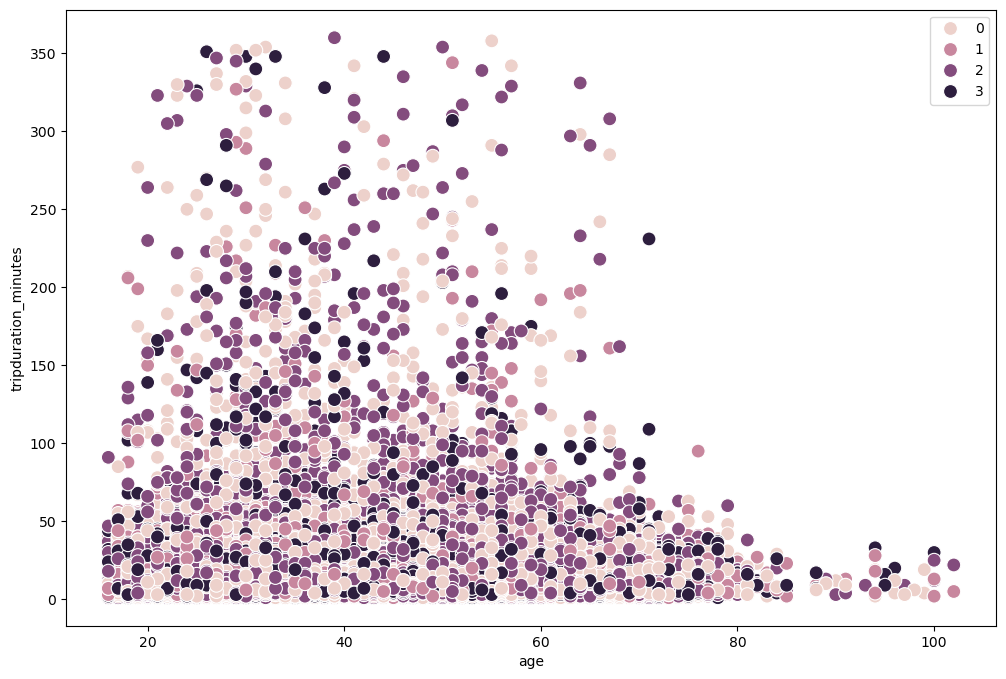

In [78]:
## plot clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=trips_num['age'], y=trips_num['tripduration_minutes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('tripduration_minutes') # Label y-axis.
plt.show()

#### The majority of trips are clustered towards younger age groups.
#### The clusters are overlapping significantly, which might indicate that K-Means struggled to find well-separated groups.

In [86]:

## check individual stats of cluster 
trips_num.groupby('clusters').agg({'tripduration_minutes':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'trip_distance':['mean', 'median']})

tripduration_minutes               age        trip_distance          
                         mean median       mean median          mean    median
clusters                                                                      
0                   12.483156   10.0  38.190754   36.0      1.713736  1.353236
1                   13.030800   10.0  37.787766   35.0      1.887191  1.439346
2                   12.440003   10.0  38.184442   36.0      1.771174  1.353397
3                   12.750606   10.0  37.600751   35.0      1.851097  1.443644

#### Given the similarity in trip duration, age, and trip distance, the clusters are not showing strong differentiation. 

#### This suggests: The K-Means algorithm may not be capturing meaningful segments in the data